# Assignment 2: Clustering

**Author** Richard Protasov


### Overview

Pokemon Go is a recent video game that allows users to travel around and catch Pokemon based on mainly their location. The game became widely popular to the general public along with developers leading to intersting applications [[1](https://github.com/search?o=desc&q=pokemon+go&s=stars&type=Repositories&utf8=%E2%9C%93)]. Given the high amount of interaction with the game an question that comes to mind is can we predict and possibly understand how the developers behind the application spawn pokemon in the world? Below is short attempt at answering this question by applying the [Predict’em All](https://www.kaggle.com/semioniy/predictemall/) dataset which contains sightings of various pokemon against clustering algorithms.  


### About the dataset

Initially I meant for this to be assignment to deal with simple image segmentation, however, I discovered that working with images with Haskell is a bumpy road. Ranging from finding and installing an image library to writing new images. Eventually, I decided that there have been too many complications which lead to finding something new. Hence, the Pokemon Go dataset provided by [Kaggle](https://www.kaggle.com/semioniy/predictemall/kernels). The dataset consists of a range of features associated with pokemon sightings in the augmented reality game. The features selected are:


- The distance of the sighting from the nearest gym in kilometers
- Population density per square km of the city the sighting is in
- The temperature in celsius at the sighting
- Hour of the sighting (in 24-hour notation)
- Terrain type i.e. water, grasslands, etc - a full list [here](http://glcf.umd.edu/data/lc/)
- Pokemon Go identifier and the associated names are [provided](http://www.ign.com/wikis/pokemon-go/List_of_Pokemon_(Pokedex))


Preprocessing is fairly straightforward. The features I am concerned with are well labeled, in addition, the dataset consisted of so many sightings that there are no shortages of data points. Because of this, I decided to discard instances which contain missing data.


The parameter K is selected in an informal fashion. Beginning with a K parameter of three and going up to a K parameter of fifteenth the associated plots of the clusters are printed. From these I choose a K which seemed to divide the clusters best among each pokemon type. A parameter K of 8 seemed to give the best results which is what the following results are based on.


### Experiments

The dataset consists of more than 150 unique pokemon that are sighted. This is a massive range of classes for a feature. More so since pokemon types are not necessarily continuous such as temperature and population density, but, pokemon types are discrete values with the appearance of being continuous i.e. 1 - 151 possibilities. To compensate for such a size of classes the K parameter will have to be increased to the extent that it runs the risk of providing no useful information.  Since pokemon are subcategorized into classes based on the occurrence/rarity i.e. common, uncommon, rare  [[1](http://www.pokego.org/rare-pokemon-list/)], and very rare, so, to prevent an odd clustering scheme, I subsetted the processed data by rarity and selected several pokemon for those to be considered rare. These pokemon and their associated identifiers are


- Muk [[89](http://www.pokego.org/pokedex/muk/)]
- Lickitung [108](http://www.pokego.org/pokedex/lickitung/)]
- Gyarados  [[130](http://www.pokego.org/pokedex/gyarados/)]
- Porygon [[137](http://www.pokego.org/pokedex/porygon/)]


From here, selected sightings are split into the categories of training (70% of the sanitized dataset) and testing (30% of the sanitized dataset). Models are trained and the resulting clusters are saved to a file. The next step includes reading the testing set and saved models which are then used to classify the testing set. The output of testing is a csv file with the format of


Algorithm | cluster/medoid | pokemon id | remaining example features
--- | --- | --- | ---
pam/km/hbu | the associated cluster | pokemon identifier | and so on


### Results

From the visuals I think it’s interesting that it’s possible to make out some sort of pattern between clusters and several rare pokemon. For instance, some pokemon tend to be associated to a ratio of clusters unlike others. However, the bigger takeaway is that all the features tend to fall into general categories for the selected pokemon across the board with no linear behavior. Hence, algorithms such as partition around medoids and k-means which depend on such characteristics result in, as I interpret it, poor clustering. A noticeable example tends to occur with gym distance and population density. Although difficult to see here due to the small testing group size, there tends to be a layering effect. This is especially noticeable in largest testing groups such as those based of the most popular pokemon. Overall, such clustering algorithms and feature selections seems to be a poor choice for this data due to the hazy boundary between features and their values resulting in mismatched clusters.


The below visuals represent plots the independent variable i.e. the pokemon types against respective dependent variables/features i.e. gym distance, population density, and etc.


Based on the results here it seems as if there is no distinguable pattern between pokemon, and so, causing inaccurate predictions of pokemon based on the selected features here. This may partially be due to the choice of pokemon (of the nearly 300,000 sightings only around 60 or so are used here), however, the stages were also ran along with the the most popular pokemon sightings (with over 100,000 instances). The selected pokemon can be updated in the prep stage by changing the filter from `rare` to `superRare` or `popular` (`popular` requiring the top `n` pokemon to be specified) and bumping up the `DSize` variable in the Makefile to one more appropriate i.e. around 2000 - 2500 before it begins to take too long to train. The results here result in similar behavior, however, categorizing and layering of variables being more so distinct.

Finally, although I understand how hierarchical bottom up clustering works, and, I do include a correctly working example of I am not sure as to how to plot it. Mainly, since the result is accumulation of splits I wasn’t sure which merged points I need to select to represent clusters. I do understand how the clustering algorithm takes a different approach to locating centers, the benefits it may have with non-linear data points, and that it does not require a parameter K (as centers can be identified where merges become large - similar to selecting the correct parameter K, but no initial guess work required). 

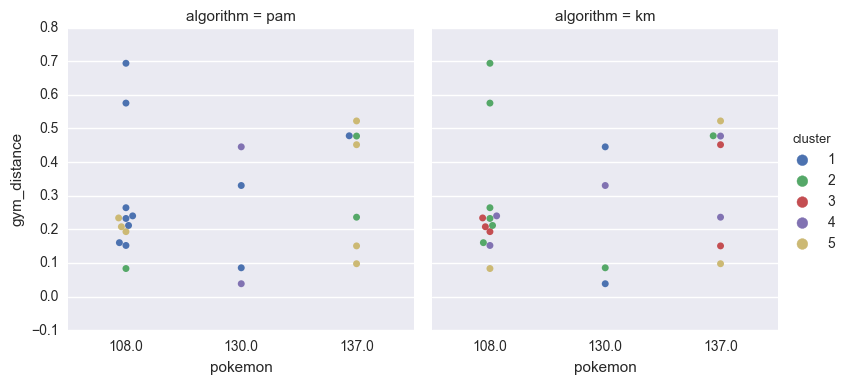

In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd

compare = pd.read_csv("data/compare.csv")

sns.factorplot(
    x="pokemon", 
    y="gym_distance", 
    hue="cluster",
    col="algorithm",
    kind="swarm",
    data=compare
)

sns.plt.show()

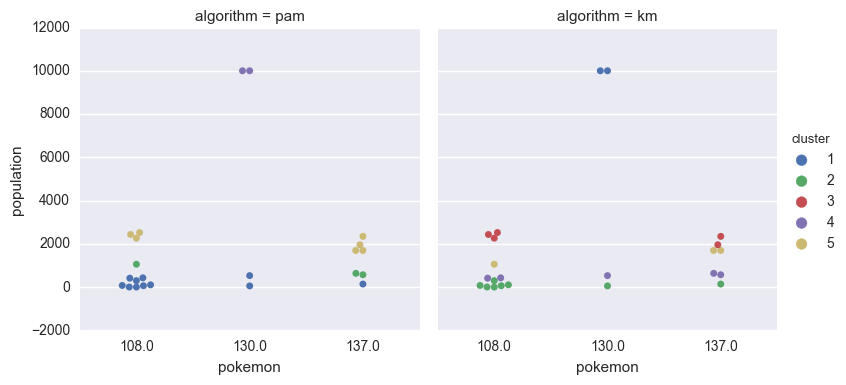

In [2]:
sns.factorplot(
    x="pokemon", 
    y="population", 
    hue="cluster",
    col="algorithm",
    kind="swarm",
    data=compare
)

sns.plt.show()

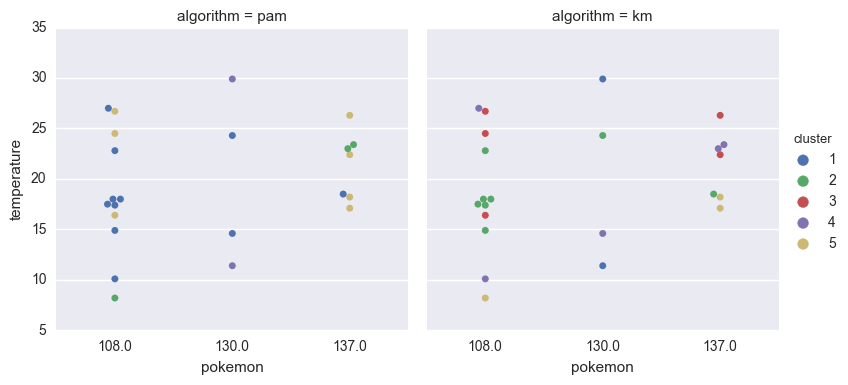

In [3]:
sns.factorplot(
    x="pokemon", 
    y="temperature", 
    hue="cluster",
    col="algorithm",
    kind="swarm",
    data=compare
)

sns.plt.show()

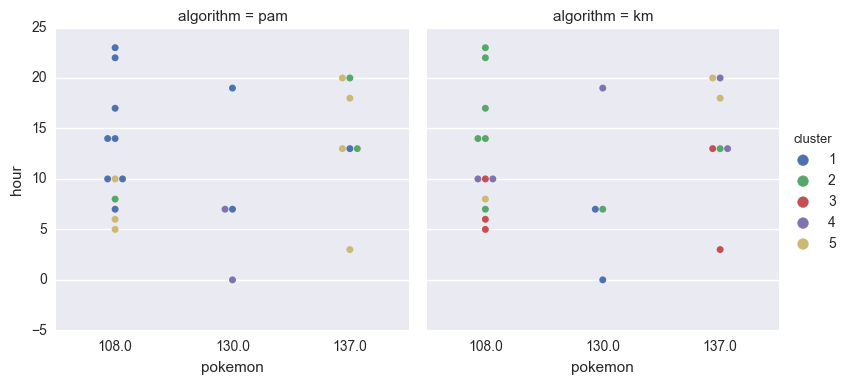

In [4]:
sns.factorplot(
    x="pokemon", 
    y="hour", 
    hue="cluster",
    col="algorithm",
    kind="swarm",
    data=compare
)

sns.plt.show()

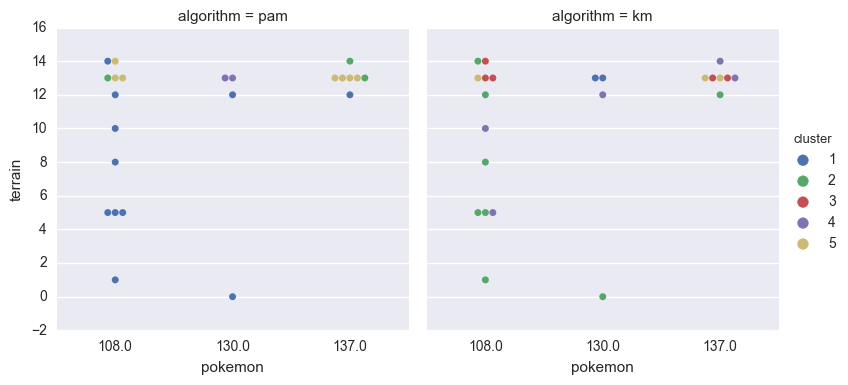

In [5]:
sns.factorplot(
    x="pokemon", 
    y="terrain", 
    hue="cluster",
    col="algorithm",
    kind="swarm",
    data=compare
)

sns.plt.show()